---
title: cheg304 hw7 q2
author: author
date: today
format:
    html:
        self-contained: true
---

### part 1
here our hypotheses are the following

- null: the viscosity is less than the limit
- alternative the viscosity is above the limit

in math, where $\mu$ is the true average viscosity

$$
H_0: \ \mu \leq 14.9\,\text{cP}
$$

$$
H_a: \ \mu > 14.9\,\text{cP}
$$

### part 2

since we have low $n$, we need to assume the underlying distribution is normal to continue our analysis so we know that the sample means will be follow the t-distribution (since we don't know population variance). now, we need to compute the sample mean and standard deviation

In [6]:
import numpy as np
from scipy.stats import t

data = "13.3 14.5 15.3 15.3 14.3 14.8 15.2 14.9 14.6 14.1"
data = data.split(' ')
data = np.array(data).astype(float)

print(f'sample mean: {data.mean():.3f}')
print(f'sample std: {data.std(ddof=1):.3f}')

sample mean: 14.630
sample std: 0.624


and now computing our t statistic since we have assumed the underlying distribution is normal but we don't know the population variance

$$
t = \frac{\bar{x} - \mu}{\sigma_{\bar{x}}} = \frac{\bar{x} - \mu}{s/\sqrt{N}}
$$

In [7]:
tvalue = (data.mean() - 14.9) / (data.std(ddof=1) / np.sqrt(len(data)))
print(f't statistic: {tvalue:.3f}')
t_c = t.ppf(0.95, len(data) - 1)
print(f't critical value: {t_c:.3f}')

t statistic: -1.369
t critical value: 1.833


we could also calculate the probability of getting a sample mean like ours or higher if we didn't want to use the critical t method

In [8]:
p = 1 - t.cdf(tvalue, len(data) - 1)
print(f'p-value: {p:.3f}')

p-value: 0.898


which makes sense since its literally on the other side of the distribution as our rejection region (which may be easily visualized)

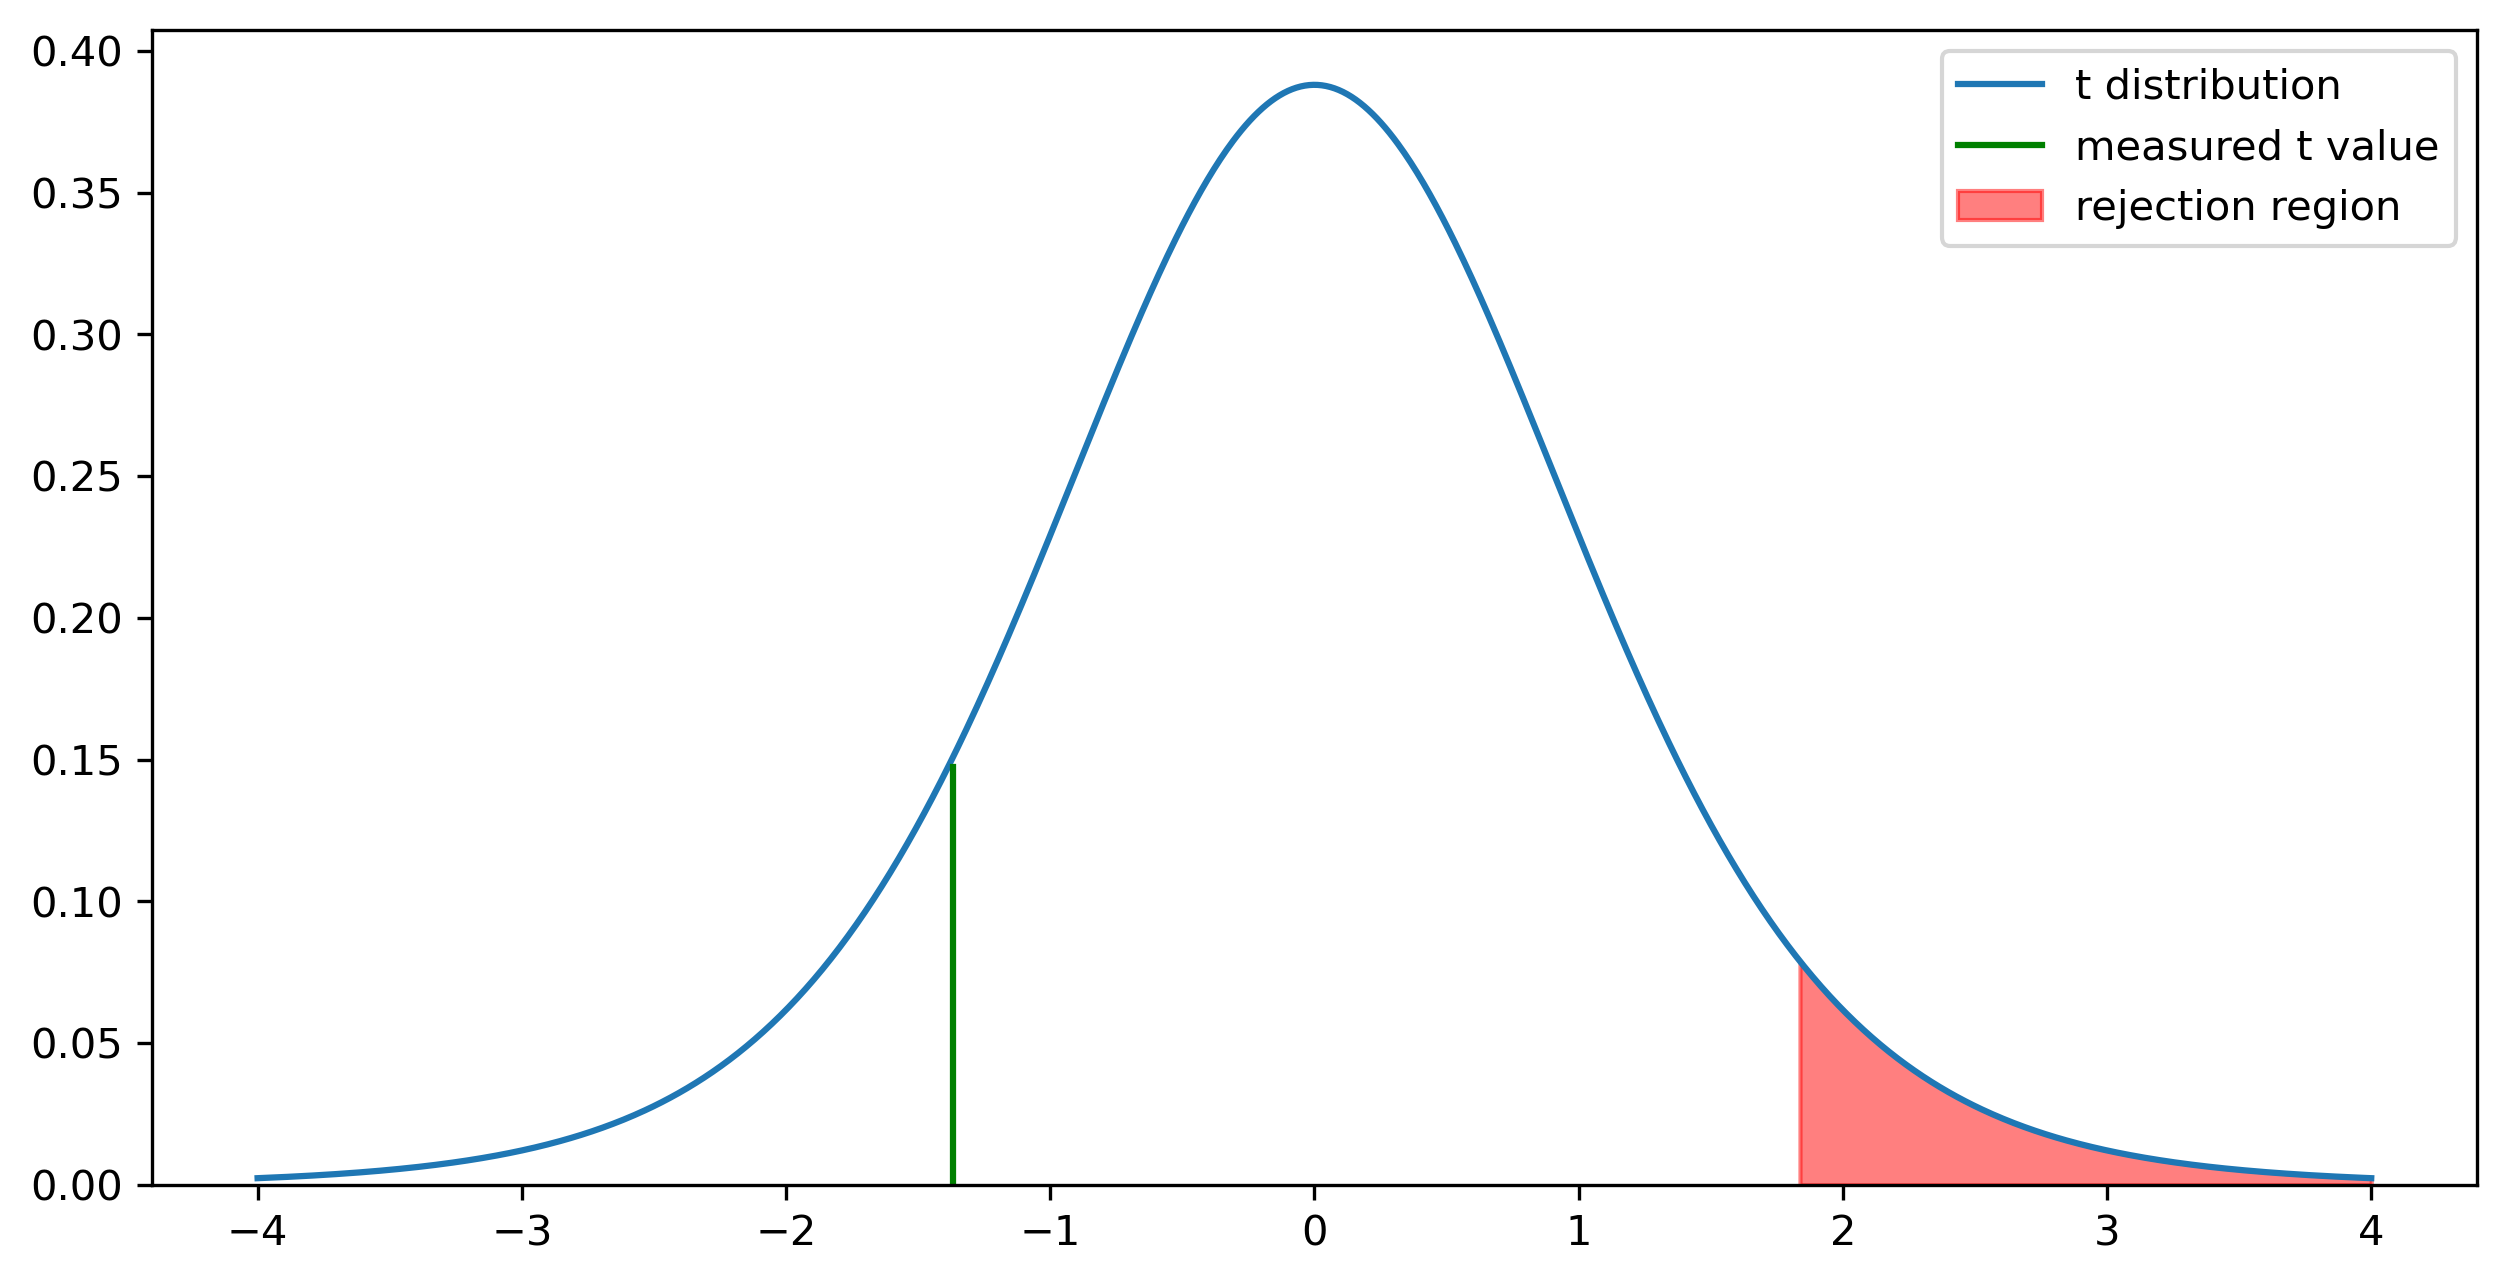

In [9]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(dpi=300, figsize=(10, 5))
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, len(data) - 1)
plt.plot(x, y, label='t distribution')
plt.axvline(tvalue, ymin=0, ymax=2.4*t.pdf(tvalue, len(data) - 1), color='green', linestyle='-', label='measured t value')
plt.fill_between(x, y, where=(x > t_c), color='red', alpha=0.5, label='rejection region')
ax.legend()
ax.set(ylim=0);

### part 3

we fail to reject the null since our t statistic is not in the rejection region. we can tell this very easily since our alternative was that the mean is higher than 14.9, but our t statistic is negative! the t critical is positive; however, our calculate is negative. **this will not change if the level of significance is changed to 0.10.** since our critical t would still be positive! (and our rejection region is $t>t_c$ for how our hypotheses are set up)

### part 4

we fail to reject the null and conclude that the true average viscosity could plausibly not exceed the 14.9 cP limit. this means that we do not need to recalibrate or replace the machine.

In [10]:
# filler